### PROJET FRUITS Jean-Pierre / YANIS / MEHDI / TARIK

In [1]:
#on commence par récupérer le zip
#import warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install zipfile36

In [2]:
import os
# import zipfile36 as zipfile 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf


In [3]:
os.getcwd()
base_dir = './archive/'

train_dir = './fruits-360_dataset/fruits-360/Training/'
validation_dir =  './fruits-360_dataset/fruits-360/Test/'
os.chdir(base_dir)

In [4]:
#un peu de nettoyage 


fruits = []
fruits_image = []

for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename)

In [5]:
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image
train_fruits

,Fruits,Fruits Image
0,Apple Braeburn,Apple Braeburn/0_100.jpg
1,Apple Braeburn,Apple Braeburn/100_100.jpg
2,Apple Braeburn,Apple Braeburn/101_100.jpg
3,Apple Braeburn,Apple Braeburn/102_100.jpg
4,Apple Braeburn,Apple Braeburn/103_100.jpg
...,...,...
67687,Watermelon,Watermelon/r_6_100.jpg
67688,Watermelon,Watermelon/r_7_100.jpg
67689,Watermelon,Watermelon/r_81_100.jpg
67690,Watermelon,Watermelon/r_8_100.jpg


In [6]:
#on rescale les pixels des images.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=60,
    class_mode='categorical'  # 'binary' si solo tienes dos clases, 'categorical' si tienes más de dos clases
)

# Configura el generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=75,
    class_mode='categorical'
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout

In [9]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_dir, target_size=(128,128), class_mode='categorical', batch_size=10)

Found 67692 images belonging to 131 classes.


In [10]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(100, 100, 3))

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)


x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)

outputs = tf.keras.layers.Dense(131, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856 

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [12]:
history = model.fit(train_generator, epochs=20, steps_per_epoch=50, 
                   validation_data=validation_generator)

Epoch 1/20
50/50 [==============================] - 119s 2s/step - loss: 4.5086 - acc: 0.0630 - val_loss: 3.5197 - val_acc: 0.1950
Epoch 2/20
50/50 [==============================] - 95s 2s/step - loss: 2.7502 - acc: 0.2937 - val_loss: 2.1190 - val_acc: 0.4400
Epoch 3/20
50/50 [==============================] - 87s 2s/step - loss: 1.4823 - acc: 0.5740 - val_loss: 1.4806 - val_acc: 0.6013
Epoch 4/20
50/50 [==============================] - 85s 2s/step - loss: 0.9823 - acc: 0.7127 - val_loss: 2.2220 - val_acc: 0.3975
Epoch 5/20
50/50 [==============================] - 86s 2s/step - loss: 0.5872 - acc: 0.8240 - val_loss: 1.2550 - val_acc: 0.6328
Epoch 6/20
50/50 [==============================] - 84s 2s/step - loss: 0.4224 - acc: 0.8670 - val_loss: 0.7760 - val_acc: 0.7807
Epoch 7/20
50/50 [==============================] - 83s 2s/step - loss: 0.3763 - acc: 0.8887 - val_loss: 0.5786 - val_acc: 0.8473
Epoch 8/20
50/50 [==============================] - 89s 2s/step - loss: 0.2757 - acc: 0.9

In [13]:
def diagnostic_learning_curves():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

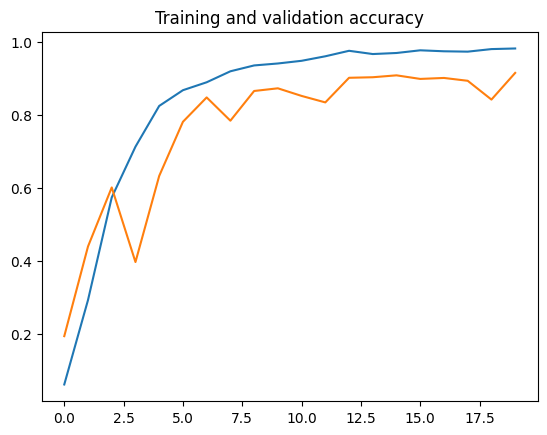

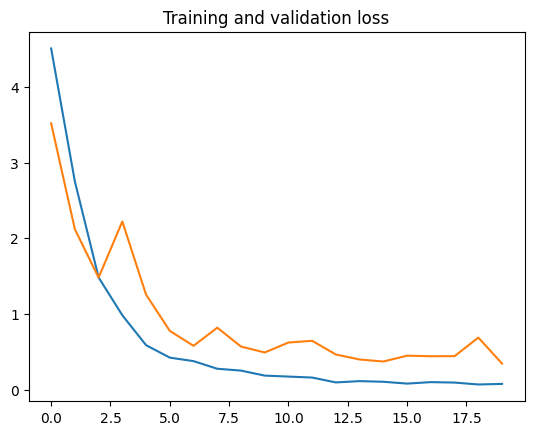

In [14]:
diagnostic_learning_curves()

In [2]:
# Prediction
y_proba = model.predict(validation_generator) 
y_proba
# pd.Series(y_proba.flatten()).head()

NameError: name 'model' is not defined

In [22]:
y_pred = (y_proba == np.argmax).astype('int32')
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

303/303 [==============================] - 75s 245ms/step


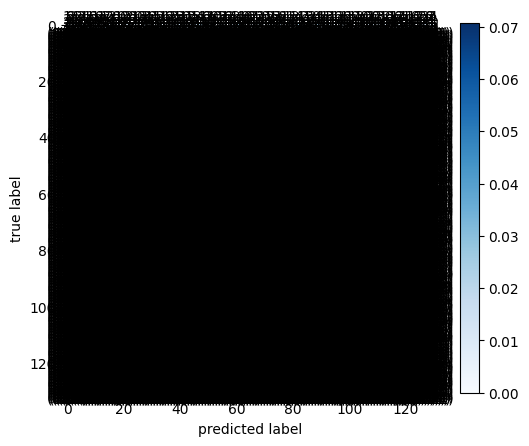

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Supposons que votre modèle prédit des probabilités pour chaque classe
# Assurez-vous de convertir ces probabilités en classes prédites
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Obtenez les étiquettes réelles
y_true = validation_generator.classes

# Créez la matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred)

# Définissez les noms de classe
class_names = ['apple', 'cherry', 'banana']

# Tracez la matrice de confusion
plot_confusion_matrix(conf_mat=conf_mat,
                      colorbar=True,
                      show_absolute=True,
                      show_normed=True)
                      # class_names=class_names)

plt.show()


In [28]:
# model.save("modele.h5")